⚡ Electric Motor Temperature Prediction - DAY 2
📊 Data Preprocessing & Feature Engineering
✅ Dataset loaded: 10000 rows, 17 columns
📅 Time range: 2024-01-01 00:00:00 to 2024-01-02 03:46:30

🔗 Top correlations with motor_temperature:
motor_temperature    1.000000
temperature_rise     0.818310
ambient              0.573911
load_percentage      0.546082
thermal_load         0.455961
current              0.445366
electrical_power     0.387455
rpm                  0.037558
is_operating_hour    0.014382
torque               0.000983
Name: motor_temperature, dtype: float64

🎯 Feature Selection for Modeling
Selected 10 features:
   1. temperature_rise          Correlation: 0.818
   2. ambient                   Correlation: 0.574
   3. load_percentage           Correlation: 0.546
   4. thermal_load              Correlation: 0.456
   5. current                   Correlation: 0.445
   6. electrical_power          Correlation: 0.387
   7. rpm                       Correlation: 0.038
   8. cooling_

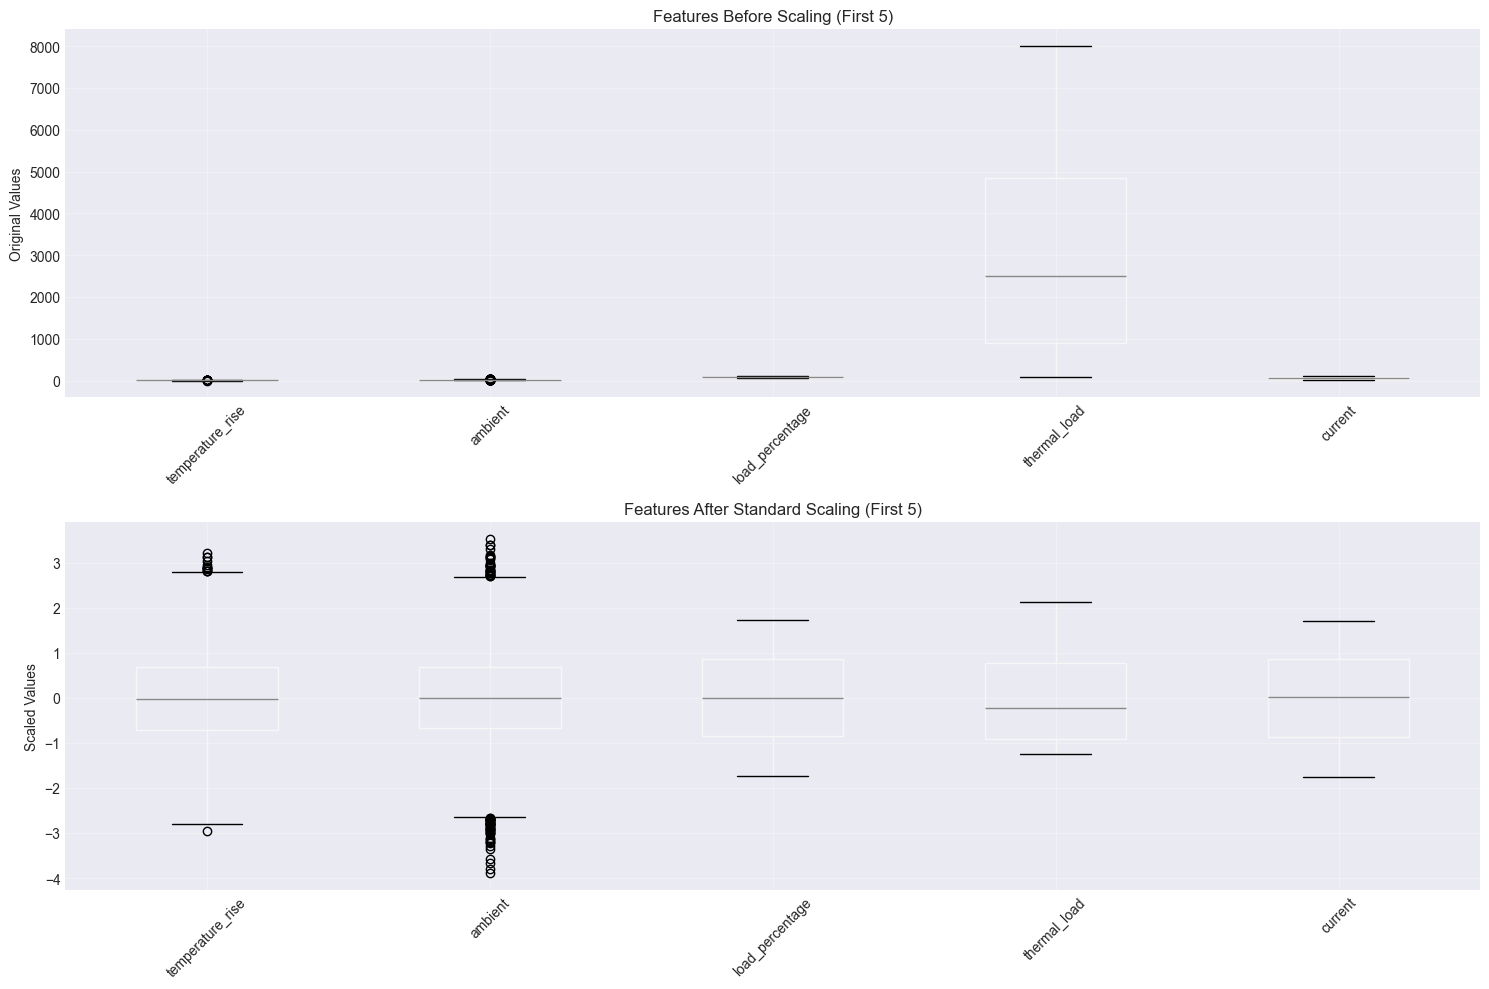


💾 Saving Processed Data...
✅ Data saved successfully!
   data/processed/X_train.npy - Training features
   data/processed/y_train.npy - Training targets
   data/processed/X_test.npy  - Testing features
   data/processed/y_test.npy  - Testing targets
   data/processed/train_data.csv - Training data (CSV)
   data/processed/test_data.csv  - Testing data (CSV)

📋 DAY 2 SUMMARY
1. Selected 10 important features
2. Split data: 8000 training, 2000 testing samples
3. Applied StandardScaler to normalize features
4. Saved processed data to data/processed/ folder

🔜 Next: Train machine learning models!

Ready for modeling with:
   X_train shape: (8000, 10)
   y_train shape: (8000,)
   X_test shape:  (2000, 10)
   y_test shape:  (2000,)


In [1]:
# Cell 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("⚡ Electric Motor Temperature Prediction - DAY 2")
print("📊 Data Preprocessing & Feature Engineering")
print("="*60)

# Cell 2: Load data
df = pd.read_csv('data/raw/motor_temperature_dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"📅 Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")

# Cell 3: Review correlations from yesterday
print("\n🔗 Top correlations with motor_temperature:")
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['motor_temperature'].sort_values(ascending=False)
print(correlations.head(10))

# Cell 4: Feature selection
print("\n🎯 Feature Selection for Modeling")
print("="*40)

# Based on correlations, select important features
selected_features = [
    'temperature_rise',    # Highest correlation (0.818)
    'ambient',             # High correlation (0.574)
    'load_percentage',     # High correlation (0.546)
    'thermal_load',        # High correlation (0.456)
    'current',             # Moderate correlation (0.445)
    'electrical_power',    # Moderate correlation (0.387)
    'rpm',                 # Low but relevant
    'cooling_efficiency',  # Negative correlation important
    'hour',                # Time feature
    'is_operating_hour'    # Operating hours
]

target = 'motor_temperature'

print(f"Selected {len(selected_features)} features:")
for i, feat in enumerate(selected_features, 1):
    corr = correlations.get(feat, 'N/A')
    print(f"  {i:2d}. {feat:25} Correlation: {corr if isinstance(corr, str) else f'{corr:.3f}'}")

# Cell 5: Create feature matrix and target vector
X = df[selected_features]
y = df[target]

print(f"\n📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")

# Cell 6: Train-test split (time-based)
print("\n🔄 Train-Test Split (80-20)")
# For time series, we split by time, not random
split_index = int(0.8 * len(df))
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Cell 7: Feature scaling
print("\n⚖️ Feature Scaling")
print("StandardScaler: Centers data to mean=0, std=1")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set scaled - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")
print(f"Testing set scaled  - Mean: {X_test_scaled.mean():.2f}, Std: {X_test_scaled.std():.2f}")

# Convert back to DataFrame for visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Cell 8: Visualize scaled features
plt.figure(figsize=(15, 10))

# Before scaling
plt.subplot(2, 1, 1)
X_train.iloc[:, :5].boxplot()  # First 5 features
plt.title('Features Before Scaling (First 5)')
plt.ylabel('Original Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# After scaling
plt.subplot(2, 1, 2)
X_train_scaled_df.iloc[:, :5].boxplot()  # First 5 features
plt.title('Features After Standard Scaling (First 5)')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 9: Save processed data
print("\n💾 Saving Processed Data...")

import os
os.makedirs('data/processed', exist_ok=True)

# Save as numpy arrays
np.save('data/processed/X_train.npy', X_train_scaled)
np.save('data/processed/X_test.npy', X_test_scaled)
np.save('data/processed/y_train.npy', y_train.values)
np.save('data/processed/y_test.npy', y_test.values)

# Save as CSV for easy inspection
train_data = pd.DataFrame(X_train_scaled, columns=selected_features)
train_data['motor_temperature'] = y_train.values
train_data.to_csv('data/processed/train_data.csv', index=False)

test_data = pd.DataFrame(X_test_scaled, columns=selected_features)
test_data['motor_temperature'] = y_test.values
test_data.to_csv('data/processed/test_data.csv', index=False)

print("✅ Data saved successfully!")
print(f"   data/processed/X_train.npy - Training features")
print(f"   data/processed/y_train.npy - Training targets")
print(f"   data/processed/X_test.npy  - Testing features")
print(f"   data/processed/y_test.npy  - Testing targets")
print(f"   data/processed/train_data.csv - Training data (CSV)")
print(f"   data/processed/test_data.csv  - Testing data (CSV)")

# Cell 10: Summary
print("\n" + "="*60)
print("📋 DAY 2 SUMMARY")
print("="*60)
print(f"1. Selected {len(selected_features)} important features")
print(f"2. Split data: {X_train.shape[0]} training, {X_test.shape[0]} testing samples")
print(f"3. Applied StandardScaler to normalize features")
print(f"4. Saved processed data to data/processed/ folder")
print(f"\n🔜 Next: Train machine learning models!")
print("\nReady for modeling with:")
print(f"   X_train shape: {X_train_scaled.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   X_test shape:  {X_test_scaled.shape}")
print(f"   y_test shape:  {y_test.shape}")
print("="*60)